In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Dataset

In [135]:
df = pd.read_csv('iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## visualization of our Dataset

In [137]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [138]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## visualization  Dataset

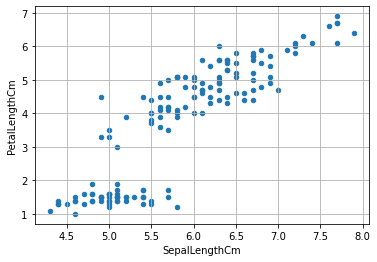

In [139]:
import matplotlib.pyplot as plt
df.plot(kind ="scatter",
          x ='SepalLengthCm',
          y ='PetalLengthCm')
plt.grid()

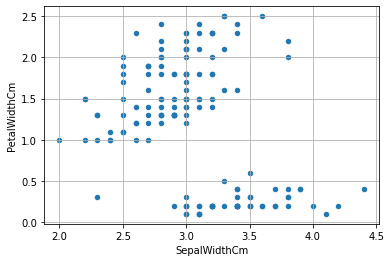

In [159]:
import matplotlib.pyplot as plt
df.plot(kind ="scatter",
          x ='SepalWidthCm',
          y ='PetalWidthCm')
plt.grid()

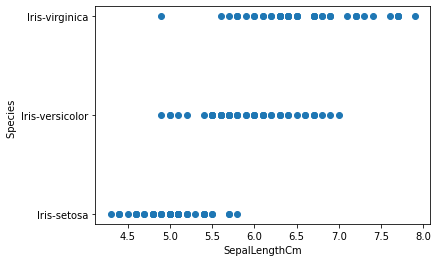

In [140]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df.SepalLengthCm,df.Species)
plt.xlabel("SepalLengthCm")
plt.ylabel("Species  ")
plt.show()

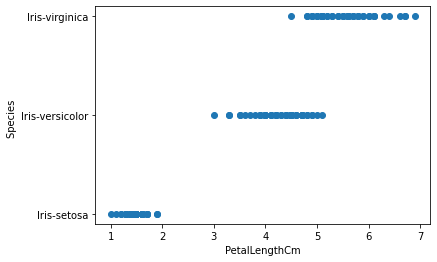

In [141]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df.PetalLengthCm,df.Species)
plt.xlabel("PetalLengthCm")
plt.ylabel("Species  ")
plt.show()

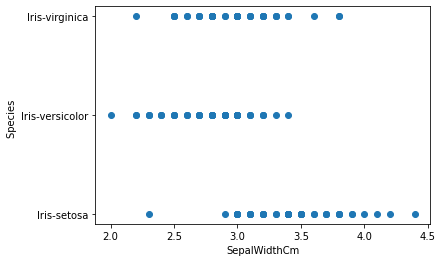

In [142]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df.SepalWidthCm,df.Species)
plt.xlabel("SepalWidthCm")
plt.ylabel("Species  ")
plt.show()

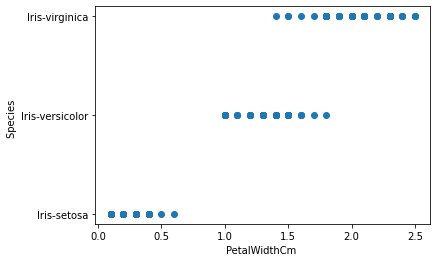

In [143]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df.PetalWidthCm ,df.Species)
plt.xlabel("PetalWidthCm ")
plt.ylabel("Species  ")
plt.show()

In [144]:
from sklearn.model_selection import train_test_split
x = df.drop('Species', axis = 1)
y = df.Species
print(y)
print("\n")
print(x)

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                           
1              5.1           3.5            1.4           0.2
2              4.9           3.0            1.4           0.2
3              4.7           3.2            1.3           0.2
4              4.6           3.1            1.5           0.2
5              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
146            6.7           3.0            5.2           2.3
147            6.3           2.5            5.0           1.9
148            6.5           3.0            5.2           2.0
149            6.2           

In [145]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y)

#LabelEncoder  to normalize labels. It can also be used to transform non-numerical labels (here y axis) to numerical labels. Technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.
#MinMaxScaler it linearily scales them down into a fixed range, where the largest occuring data point corresponds to the maximum value and the smallest one corresponds to the minimum value. 

In [146]:
from sklearn.preprocessing import LabelEncoder as LE
enc = LE()

y_tr_enc = enc.fit_transform(y_tr)
y_ts_enc = enc.transform(y_ts)

In [147]:
x_tr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
87,6.7,3.1,4.7,1.5
7,4.6,3.4,1.4,0.3
133,6.4,2.8,5.6,2.2
101,6.3,3.3,6.0,2.5
142,6.9,3.1,5.1,2.3
...,...,...,...,...
8,5.0,3.4,1.5,0.2
125,6.7,3.3,5.7,2.1
110,7.2,3.6,6.1,2.5


In [148]:
from sklearn.preprocessing import MinMaxScaler as MMS
scaler = MMS()
x_tr_sc = scaler.fit_transform(x_tr)
x_ts_sc = scaler.transform(x_ts)

# KNeighbors Classification

In [149]:
from sklearn.neighbors import KNeighborsClassifier as KNC
model_knn = KNC()
model_knn.fit(x_tr_sc, y_tr_enc)

KNeighborsClassifier()

In [150]:
predict1 = model_knn.predict(x_ts_sc)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_ts_enc ,predict1)*100)


97.36842105263158


In [151]:
from sklearn import metrics
print(metrics.confusion_matrix(y_ts_enc, predict1))

[[16  0  0]
 [ 0 10  0]
 [ 0  1 11]]


In [152]:
print(metrics.classification_report(y_ts_enc,predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



# Logistic  Regression

In [153]:
from sklearn.linear_model import LogisticRegression as LR
model_LR = LR()
model_LR.fit(x_tr_sc, y_tr_enc)

LogisticRegression()

In [154]:
predict2 = model_LR.predict(x_ts_sc)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_ts_enc ,predict2)*100)

94.73684210526315


# DecisionTree Regression

In [157]:
from sklearn.tree import DecisionTreeRegressor  as DT
model_DT = DT()
model_DT.fit(x_tr_sc, y_tr_enc)

DecisionTreeRegressor()

In [158]:
predict3 = model_DT.predict(x_ts_sc)
#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_ts_enc ,predict3)*100)

94.73684210526315
